In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

In [2]:
X= pd.read_csv("cleaned_data_subset.csv", sep='\\\t', engine='python')
X=X.rename(columns={'Company"': 'Company', '"IV Bloomberg': 'IV Bloomberg'})
X=X.drop(columns=['today'])
X.head(20)

,IV Bloomberg,Put Price,Spot,Strike,Volume,Maturity,absolute_div,rel_div,int_rate,Company
0,"""0.185022449493408",1.68,48.2785,40.0,35.0,714.0,0.4,0.033141,2.52,"KO"""
1,"""0.166804180145264",3.06,48.2785,45.0,18.0,714.0,0.4,0.033141,2.52,"KO"""
2,"""0.160661716461182",3.75,48.2785,47.0,7.0,714.0,0.4,0.033141,2.52,"KO"""
3,"""0.151099138259888",5.13,48.2785,50.0,35.0,714.0,0.4,0.033141,2.52,"KO"""
4,"""0.137878675460815",8.25,48.2785,55.0,1.0,714.0,0.4,0.033141,2.52,"KO"""
5,"""0.13358140945434602",10.10,48.2785,57.5,6.0,714.0,0.4,0.033141,2.52,"KO"""
6,"""0.126878786087036",12.10,48.2785,60.0,17.0,714.0,0.4,0.033141,2.52,"KO"""
7,"""0.29667272567749",0.02,48.2785,45.0,1.0,7.0,0.4,0.033141,2.41,"KO"""
8,"""0.226072883605957",0.01,48.2785,46.0,18.0,7.0,0.4,0.033141,2.41,"KO"""
9,"""0.19854175567627",0.03,48.2785,46.5,121.0,7.0,0.4,0.033141,2.41,"KO"""


In [3]:
X['IV Bloomberg'] = X['IV Bloomberg'].str.replace(r'\D', '')
X['Company'] = X['Company'].str.replace(r'"', '')
X['IV Bloomberg'] = X['IV Bloomberg'].astype(float)
X.head()

,IV Bloomberg,Put Price,Spot,Strike,Volume,Maturity,absolute_div,rel_div,int_rate,Company
0,1.850224e+14,1.68,48.2785,40.0,35.0,714.0,0.4,0.033141,2.52,KO
1,1.668042e+14,3.06,48.2785,45.0,18.0,714.0,0.4,0.033141,2.52,KO
2,1.606617e+14,3.75,48.2785,47.0,7.0,714.0,0.4,0.033141,2.52,KO
3,1.510991e+14,5.13,48.2785,50.0,35.0,714.0,0.4,0.033141,2.52,KO
4,1.378787e+14,8.25,48.2785,55.0,1.0,714.0,0.4,0.033141,2.52,KO


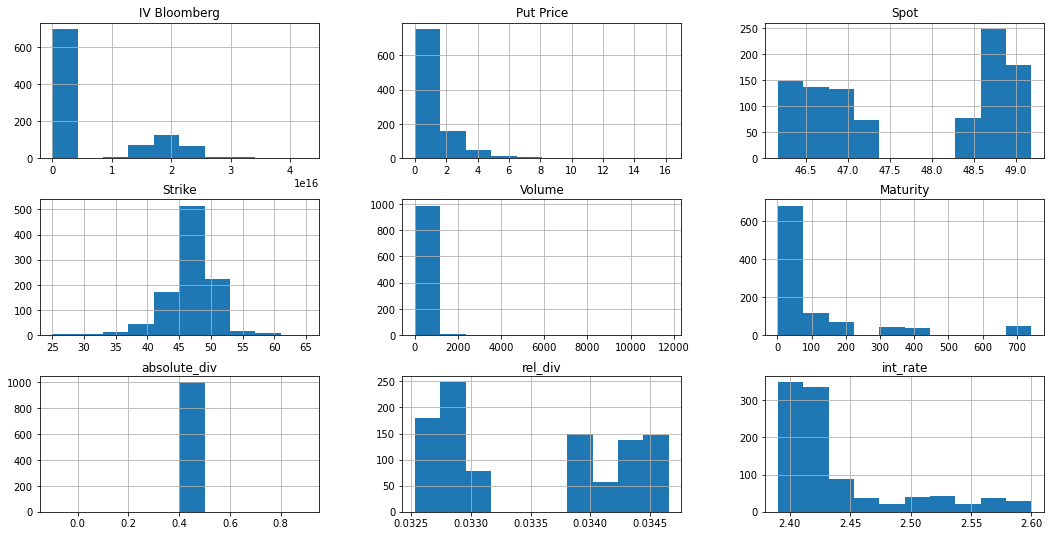

In [4]:
X.hist(figsize=(18,9))
plt.show()

In [5]:
X.isnull().sum()

IV Bloomberg    0
Put Price       0
Spot            0
Strike          0
Volume          0
Maturity        0
absolute_div    0
rel_div         0
int_rate        0
Company         0
dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
X.columns
imputed_X = X.copy()

In [7]:
#mean_imputer = Imputer(strategy='mean', axis=0)
#mean_imputer = mean_imputer.fit(X)
mean_imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X = mean_imputer.fit_transform(X.drop(columns=['Company']))
#imputed_X = pd.DataFrame(imputed_X)#, columns = X.columns)
type(imputed_X)
imputed_X.shape

(998, 9)

In [8]:
imputed_X = pd.DataFrame(imputed_X, columns = ['IV Bloomberg', 'Put Price', 'Spot', 'Strike', 'Volume', 'Maturity','absolute_div', 'rel_div', 'int_rate'])
imputed_X.head()

,IV Bloomberg,Put Price,Spot,Strike,Volume,Maturity,absolute_div,rel_div,int_rate
0,1.850224e+14,1.68,48.2785,40.0,35.0,714.0,0.4,0.033141,2.52
1,1.668042e+14,3.06,48.2785,45.0,18.0,714.0,0.4,0.033141,2.52
2,1.606617e+14,3.75,48.2785,47.0,7.0,714.0,0.4,0.033141,2.52
3,1.510991e+14,5.13,48.2785,50.0,35.0,714.0,0.4,0.033141,2.52
4,1.378787e+14,8.25,48.2785,55.0,1.0,714.0,0.4,0.033141,2.52


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(imputed_X)#.drop(columns=['Company']))
rescaledX = pd.DataFrame(rescaledX)
rescaledX['Company']=X['Company']
rescaledX.columns = X.columns

In [10]:
rescaledX=rescaledX.drop(columns=['Volume','absolute_div', 'rel_div', 'int_rate','Company' ])
rescaledX.head()

,IV Bloomberg,Put Price,Spot,Strike,Maturity
0,0.004333,0.103150,0.700634,0.375,0.960916
1,0.003907,0.188388,0.700634,0.500,0.960916
2,0.003763,0.231007,0.700634,0.550,0.960916
3,0.003539,0.316245,0.700634,0.625,0.960916
4,0.003229,0.508956,0.700634,0.750,0.960916


In [11]:
imputed_X=imputed_X.drop(columns=['Volume','absolute_div', 'rel_div', 'int_rate' ])
imputed_X

,IV Bloomberg,Put Price,Spot,Strike,Maturity
0,1.850224e+14,1.680000,48.2785,40.0,714.0
1,1.668042e+14,3.060000,48.2785,45.0,714.0
2,1.606617e+14,3.750000,48.2785,47.0,714.0
3,1.510991e+14,5.130000,48.2785,50.0,714.0
4,1.378787e+14,8.250000,48.2785,55.0,714.0
...,...,...,...,...,...
993,1.704195e+14,0.520000,49.1807,47.0,66.0
994,1.621152e+13,0.730000,49.1807,48.0,66.0
995,1.535704e+14,1.130000,49.1807,49.0,66.0
996,1.474474e+14,1.510000,49.1807,50.0,66.0


In [12]:
rescaledX_train, rescaledX_test = train_test_split(rescaledX, test_size=0.2, random_state=2,shuffle=True)

In [13]:
rescaledX_test.shape, rescaledX_train.shape

((200, 5), (798, 5))

In [14]:
from keras.models import Sequential
import keras
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import optimizers
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [15]:
def baseline_model(numbers):
    model = Sequential()
    model.add(Dense(numbers, input_dim = 4, init= keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(1, init = keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None)))
    #Compile model
    optimizer_ = optimizers.SGD(lr=0.005, decay = 1e-6, momentum = 0.9, nesterov=False)
    model.compile(loss = "mean_squared_error" , optimizer = optimizer_)
    return model

In [16]:
NeuralNetwork = baseline_model(9)

C:\Users\Dell\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, input_dim=4, kernel_initializer=<keras.ini...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer=<keras.ini...)`
  """


In [17]:
Number_epochs = 400
Batch_size = 64

In [18]:
history = NeuralNetwork.fit(x = rescaledX_train.drop(["Put Price"],axis=1), y = rescaledX_train["Put Price"], 
                            batch_size = Batch_size, epochs = Number_epochs, 
                           validation_data =(rescaledX_test.drop(["Put Price"],axis=1), rescaledX_test["Put Price"]))

Train on 798 samples, validate on 200 samples
Epoch 1/400
798/798 [==============================] - 0s 438us/step - loss: 0.0477 - val_loss: 0.0260
Epoch 2/400
798/798 [==============================] - 0s 49us/step - loss: 0.0212 - val_loss: 0.0310
Epoch 3/400
798/798 [==============================] - 0s 49us/step - loss: 0.0195 - val_loss: 0.0222
Epoch 4/400
798/798 [==============================] - 0s 39us/step - loss: 0.0168 - val_loss: 0.0193
Epoch 5/400
798/798 [==============================] - 0s 46us/step - loss: 0.0159 - val_loss: 0.0184
Epoch 6/400
798/798 [==============================] - 0s 41us/step - loss: 0.0151 - val_loss: 0.0176
Epoch 7/400
798/798 [==============================] - ETA: 0s - loss: 0.008 - 0s 41us/step - loss: 0.0146 - val_loss: 0.0167
Epoch 8/400
798/798 [==============================] - 0s 41us/step - loss: 0.0142 - val_loss: 0.0159
Epoch 9/400
798/798 [==============================] - 0s 50us/step - loss: 0.0138 - val_loss: 0.0152
Epoch 10/40

Text(0, 0.5, 'MSE')

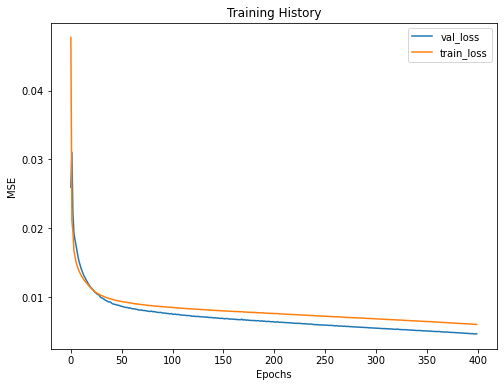

In [19]:
plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='train_loss')
plt.title("Training History")
plt.xlabel("Epochs")
plt.legend()
plt.ylabel("MSE")

Text(0.5, 1.0, 'Training History')

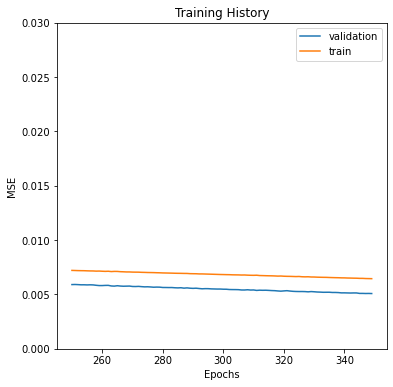

In [21]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.plot(np.arange(250, 350), np.array(history.history['val_loss'])[250:350], label="validation")
plt.plot(np.arange(250, 350), np.array(history.history['loss'])[250:350], label="train")
plt.ylim(0.000,0.03)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Training History")